<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/DescriptiveStatisticsTestsADfuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# augmented dicky fuller 
from statsmodels.tsa.stattools import adfuller

In [2]:
data_1 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/airline_passengers.csv", index_col='Month', parse_dates=True)
data_2 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)

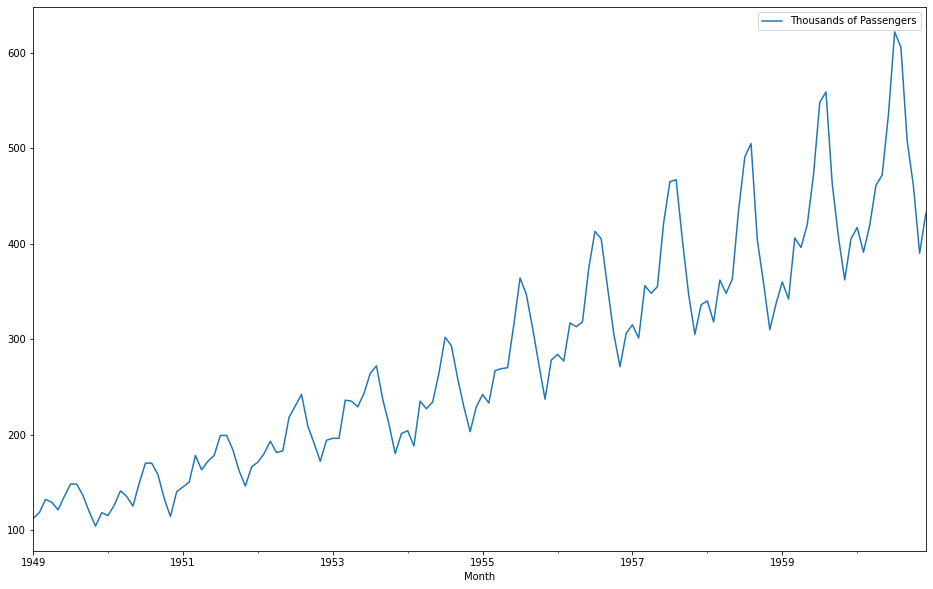

In [3]:
data_1.plot(figsize=(16,10))

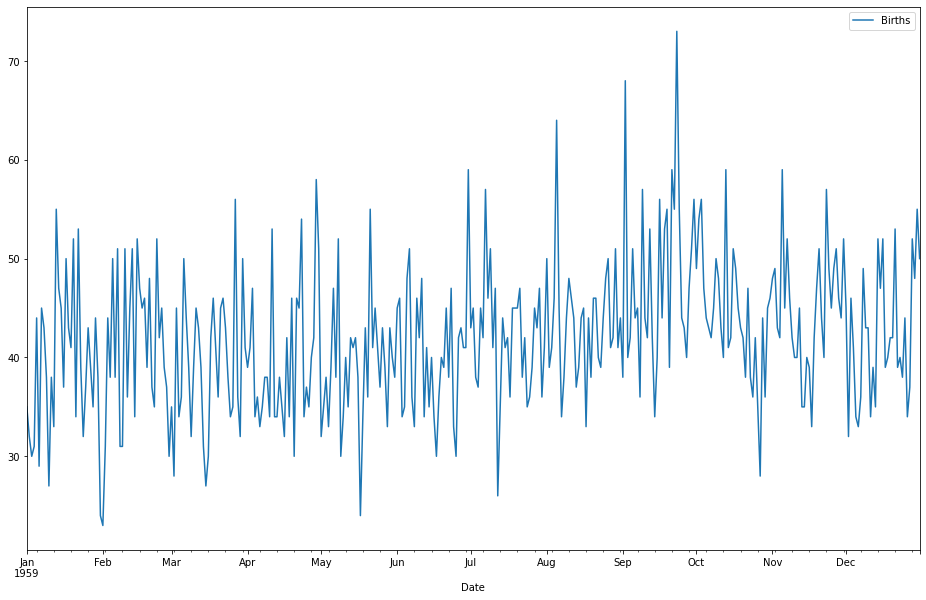

In [4]:
data_2.plot(figsize=(16,10))

In [17]:
data_1_adfuller = adfuller(data_1['Thousands of Passengers'])
data_1_adfuller

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [19]:
data_1_adfuller_series = pd.Series(data_1_adfuller[0:4], index=['ADF test statistics', 'p_value', 'lags_used', 'observations'])
for key, val in data_1_adfuller[4].items():
    data_1_adfuller_series[f'critical_value({key})'] = val

In [20]:
data_1_adfuller_series # important is p_value

ADF test statistics      0.815369
p_value                  0.991880
lags_used               13.000000
observations           130.000000
critical_value(1%)      -3.481682
critical_value(5%)      -2.884042
critical_value(10%)     -2.578770
dtype: float64

In [21]:
def adf_test(series, title=''):
    """
    pass time series and titile is optional
    return ADF report
    """
    print(f'Augmented Dickey-Fuller test : {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    label = ['ADF test statistics', 'p_value', 'lags_used', 'observations']
    out = pd.Series(result[0:4], index=label)

    # iterate adfuller test dict
    for key, val in result[4].items():
        out[f'critical_value({key})'] = val
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data a unit root and is non-stationay')

In [22]:
adf_test(data_1['Thousands of Passengers'])

Augmented Dickey-Fuller test : 
ADF test statistics      0.815369
p_value                  0.991880
lags_used               13.000000
observations           130.000000
critical_value(1%)      -3.481682
critical_value(5%)      -2.884042
critical_value(10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [23]:
adf_test(data_2['Births'])

Augmented Dickey-Fuller test : 
ADF test statistics     -4.808291
p_value                  0.000052
lags_used                6.000000
observations           358.000000
critical_value(1%)      -3.448749
critical_value(5%)      -2.869647
critical_value(10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
